In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage.draw import line
from skimage.filters import gaussian
from skimage import io, color
from collections import deque

In [2]:
def convertToBinary(image, threshold=0.2):
    binary_image = (image > threshold) # Apply thresholding
    return binary_image.astype(np.uint8)

In [3]:
def convertBlackWhite(image):
    invertedImage = [[1 if pixel == 0 else 0 for pixel in row] for row in image]
    return np.array(invertedImage, dtype=np.float64)

In [4]:
def showImage(image, save=False, name='Map'):
    plt.imshow(image, cmap='gray')
    if save:
        plt.savefig(f'{name}.png')
    plt.show()

In [5]:
gridPath = 'Map.jpg'
myMap = mpimg.imread(gridPath)
myMap = color.rgb2gray(myMap)
myMap = convertToBinary(myMap)
myMap = convertBlackWhite(myMap)
print(myMap)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 0.]]


In [ ]:
rows = len(myMap)
cols = len(myMap[0])

print(np.unique(myMap))

[0. 1.]


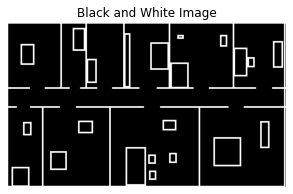

In [7]:
plt.figure(figsize=(5, 5))
plt.imshow(myMap, cmap='gray')
plt.axis('off')  # Hide axis values
plt.title('Black and White Image')
plt.show()

In [8]:
# Function to compute the likelihood value given distance and variance
def likelihood(distance, variance):
    part_one = 1 / (math.sqrt(2 * math.pi * variance))
    part_two = math.exp(-0.5 * ((distance**2 / variance) ))
    result = part_one * part_two
    return result

In [9]:
# Get obstacles locations
obsLocationsMatrix = np.argwhere(myMap == 1)

print(obsLocationsMatrix.shape)

(28942, 2)


In [10]:
# Function to get the min distance between given point and all obstacles
def getMinDistance(x, y):

    # Compute all distances
    distances = np.sqrt((obsLocationsMatrix[:, 0] - x) ** 2 + (obsLocationsMatrix[:, 1] - y) ** 2)
    
    # Find the minimum distance
    min_distance = np.min(distances)
    
    return (min_distance)

In [11]:
# Get the min distances and save it
minDistances = np.zeros((rows, cols), dtype=float)
for i in range(0, rows):
    for j in range(0, cols):
        minDistances[i,j] = getMinDistance(i, j)
    print("(",i,")")


( 0 )
( 1 )
( 2 )
( 3 )
( 4 )
( 5 )
( 6 )
( 7 )
( 8 )
( 9 )
( 10 )
( 11 )
( 12 )
( 13 )
( 14 )
( 15 )
( 16 )
( 17 )
( 18 )
( 19 )
( 20 )
( 21 )
( 22 )
( 23 )
( 24 )
( 25 )
( 26 )
( 27 )
( 28 )
( 29 )
( 30 )
( 31 )
( 32 )
( 33 )
( 34 )
( 35 )
( 36 )
( 37 )
( 38 )
( 39 )
( 40 )
( 41 )
( 42 )
( 43 )
( 44 )
( 45 )
( 46 )
( 47 )
( 48 )
( 49 )
( 50 )
( 51 )
( 52 )
( 53 )
( 54 )
( 55 )
( 56 )
( 57 )
( 58 )
( 59 )
( 60 )
( 61 )
( 62 )
( 63 )
( 64 )
( 65 )
( 66 )
( 67 )
( 68 )
( 69 )
( 70 )
( 71 )
( 72 )
( 73 )
( 74 )
( 75 )
( 76 )
( 77 )
( 78 )
( 79 )
( 80 )
( 81 )
( 82 )
( 83 )
( 84 )
( 85 )
( 86 )
( 87 )
( 88 )
( 89 )
( 90 )
( 91 )
( 92 )
( 93 )
( 94 )
( 95 )
( 96 )
( 97 )
( 98 )
( 99 )
( 100 )
( 101 )
( 102 )
( 103 )
( 104 )
( 105 )
( 106 )
( 107 )
( 108 )
( 109 )
( 110 )
( 111 )
( 112 )
( 113 )
( 114 )
( 115 )
( 116 )
( 117 )
( 118 )
( 119 )
( 120 )
( 121 )
( 122 )
( 123 )
( 124 )
( 125 )
( 126 )
( 127 )
( 128 )
( 129 )
( 130 )
( 131 )
( 132 )
( 133 )
( 134 )
( 135 )
( 136 )
( 137 )
( 138 

FileNotFoundError: [Errno 2] No such file or directory: './req2_output/variance_0.5.png'

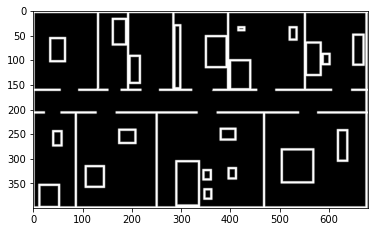

In [12]:
# Get the liklihood values for different variances
variance = 0.5
maxLikelihoods = np.zeros((rows, cols), dtype=float)
while variance < 65:
    for i in range(0, rows):
        for j in range(0, cols):
            maxLikelihoods[i,j] = likelihood(minDistances[i,j], variance)
    showImage(maxLikelihoods, True, "variance_"+str(variance))
    variance *= 2